https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Input, Conv2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [17]:
from sklearn.metrics import classification_report

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
labels = ['airplane','automobile','bird','cat','deer','dog',\
          'frog','horse','ship','truck']

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Text(0.5, 1.0, 'bird')

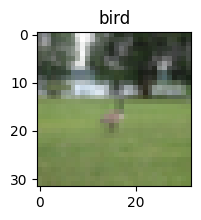

In [3]:
plt.figure(figsize=(2,2))
indx = np.random.choice(range(50000))
plt.imshow(x_train[indx])
plt.title(labels[y_train[indx][0]])

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
cnn = Sequential([
    InputLayer(input_shape=(32,32,3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    MaxPool2D(),

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    MaxPool2D(),

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    MaxPool2D(),

    Flatten(),

    Dense(1024, activation='relu'),

    Dense(10, activation='softmax')])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
hist1 = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 8ms/step - loss: 1.5024 - accuracy: 0.4472 - val_loss: 1.1604 - val_accuracy: 0.5852
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0427 - accuracy: 0.6271 - val_loss: 0.9802 - val_accuracy: 0.6550
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8585 - accuracy: 0.6955 - val_loss: 0.8823 - val_accuracy: 0.6908
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7363 - accuracy: 0.7387 - val_loss: 0.8396 - val_accuracy: 0.7145
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6441 - accuracy: 0.7718 - val_loss: 0.7747 - val_accuracy: 0.7341


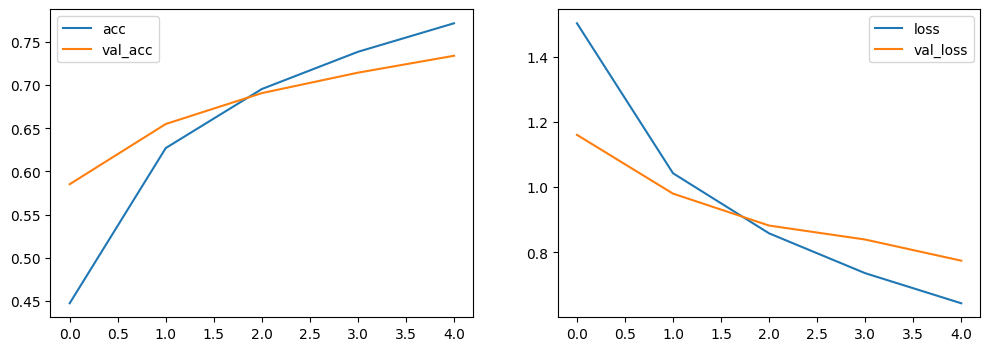

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend()

In [13]:
cnn.predict(x_test,verbose=False)[0,:]

array([5.5586279e-05, 1.7365404e-04, 4.4973454e-04, 6.9683790e-01,
       9.2821196e-04, 2.5809416e-01, 3.3525150e-02, 9.0016845e-05,
       9.4545037e-03, 3.9101162e-04], dtype=float32)

In [14]:
y_pred = np.argmax(cnn.predict(x_test,verbose=False),axis=1)

In [15]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [18]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

    airplane       0.84      0.67      0.75      1000
  automobile       0.85      0.87      0.86      1000
        bird       0.59      0.67      0.63      1000
         cat       0.54      0.55      0.55      1000
        deer       0.66      0.72      0.69      1000
         dog       0.66      0.62      0.64      1000
        frog       0.74      0.84      0.79      1000
       horse       0.79      0.77      0.78      1000
        ship       0.86      0.83      0.85      1000
       truck       0.86      0.79      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.74     10000
weighted avg       0.74      0.73      0.74     10000



cat


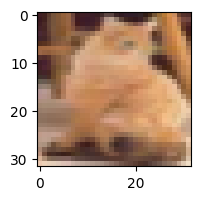

In [23]:
plt.figure(figsize=(2,2))
indx = np.random.choice(range(x_test.shape[0]))
print(labels[np.argmax(cnn.predict(x_test[indx:indx+1,:],verbose=False).reshape(-1))])
plt.imshow(x_test[indx])